# SNA Project - Adam Steciuk

## Data collection

In [2]:
from reddit_secrets import CLIENT_ID, CLIENT_SECRET, USER_AGENT
import pandas as pd
import praw
import os
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [13]:
DATA_DIRECTORY = 'data'
NETWORKS_DIRECTORY = 'networks'
DATA_PATH = os.path.join(os.getcwd(), DATA_DIRECTORY)
NETWORKS_PATH = os.path.join(os.getcwd(), NETWORKS_DIRECTORY)

if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)

if not os.path.exists(NETWORKS_PATH):
    os.mkdir(NETWORKS_PATH)

In [2]:
NUM_POSTS_FROM_SUB = 500
NUM_SUBS_OF_USER = 5
MIN_TIMES_POSTED = 2
MAX_DEPTH = 10

sub_q = ["programming"]
visited_subs = {sub_q[0]: 0}

reddit = praw.Reddit(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, user_agent=USER_AGENT)

num_posts_saved = 0

# BFS; take the first subreddit from the queue and check if the depth is less than MAX_DEPTH
while len(sub_q) > 0 and (sub:=sub_q.pop(0)):
    print("=========================================")
    print(f"Processing '{sub}' on depth {visited_subs[sub]}")
    print(f"Queue size: {len(sub_q)}")
    print(f"Num posts saved so far: {num_posts_saved}")

    # download posts from the subreddit
    posts = list(reddit.subreddit(sub).top(limit=NUM_POSTS_FROM_SUB, time_filter="all"))
    if len(posts) < NUM_POSTS_FROM_SUB:
        print(f"Only {len(posts)} posts found")

    data_df = pd.DataFrame(
        [[post.title, post.score, post.id, post.url, post.num_comments, post.created, post.author, post.upvote_ratio, post.permalink, post.subreddit, post.subreddit_subscribers] for post in posts],
        columns=["title", "score", "id", "url", "num_comments", "created", "author", "upvote_ratio", "permalink", "subreddit", "subreddit_subscribers"],
    )

    # filter out posts made by deleted users
    data_df = data_df[data_df["author"].notna()]

    # keep only authors that posted more then MIN_TIMES_POSTED times
    data_df["author_name"] = data_df["author"].apply(lambda x: x.name)
    data_df = data_df.groupby("author_name").filter(lambda x: len(x) >= MIN_TIMES_POSTED)
    authors = data_df["author"].unique()
    num_posts = len(data_df)
    num_posts_saved += num_posts
    print(f"Num posts after filtering out: {num_posts} from {len(authors)} authors")

    # save dataframe to csv
    data_df.to_csv(f"{DATA_PATH}/posts_{sub}.csv", index=False)

    # check if we reached the max depth
    if visited_subs[sub] >= MAX_DEPTH:
        print("Max depth reached")
    else:
        # get subreddits of authors
        for author in authors:
            try:
                # try to get submissions of the author
                user_submissions = list(author.submissions.top(limit=NUM_SUBS_OF_USER, time_filter="all"))

                # extract subreddits from top user submissions and add them to the queue
                for submission in user_submissions:
                    sub_name = submission.subreddit.display_name
                    if sub_name not in visited_subs:
                        sub_q.append(sub_name)
                        visited_subs[sub_name] = visited_subs[sub] + 1
            except:
                print(f"ERROR: User submissions are private for '{author}'")





Processing 'programming' on depth 0
Queue size: 0
Num posts saved so far: 0
Num posts after filtering out: 116 from 40 authors
ERROR: User submissions are private for 'Gabrecks'
Processing 'todayilearned' on depth 1
Queue size: 43
Num posts saved so far: 116
Num posts after filtering out: 114 from 39 authors
ERROR: User submissions are private for 'palmfranz'
ERROR: User submissions are private for 'truehalf'
ERROR: User submissions are private for 'Kingflares'
ERROR: User submissions are private for 'nokia621'
ERROR: User submissions are private for 'sl1878'
ERROR: User submissions are private for 'BirdPlan'
ERROR: User submissions are private for 'ransomedagger'
Processing 'InternetIsBeautiful' on depth 1
Queue size: 60
Num posts saved so far: 230
Num posts after filtering out: 41 from 19 authors
Processing 'Games' on depth 1
Queue size: 88
Num posts saved so far: 271
Num posts after filtering out: 158 from 37 authors
ERROR: User submissions are private for 'ORCT2RCTWPARKITECT'
ERROR

ServerError: received 504 HTTP response

In [4]:
posts_df = pd.DataFrame(
    columns=["title", "score", "id", "url", "num_comments", "created", "author", "upvote_ratio", "permalink", "subreddit", "subreddit_subscribers"],
)

for _root, _dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.endswith(".csv"):
            posts_df = pd.concat([posts_df, pd.read_csv(os.path.join(DATA_PATH, file))], ignore_index=True)

display(posts_df.info())
display(posts_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23833 entries, 0 to 23832
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  23833 non-null  object 
 1   score                  23833 non-null  object 
 2   id                     23833 non-null  object 
 3   url                    23833 non-null  object 
 4   num_comments           23833 non-null  object 
 5   created                23833 non-null  float64
 6   author                 23833 non-null  object 
 7   upvote_ratio           23833 non-null  float64
 8   permalink              23833 non-null  object 
 9   subreddit              23833 non-null  object 
 10  subreddit_subscribers  23833 non-null  object 
 11  author_name            23833 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.2+ MB


None

,title,score,id,url,num_comments,created,author,upvote_ratio,permalink,subreddit,subreddit_subscribers,author_name
0,anime_irl,61838,v5pw6o,https://i.redd.it/uh2vc0cy4w391.gif,535,1.654473e+09,NekoWafers,0.92,/r/anime_irl/comments/v5pw6o/anime_irl/,anime_irl,2680226,NekoWafers
1,anime_irl,48804,rlbhh5,https://v.redd.it/wqlc6vm6dv681,684,1.640081e+09,StazCherryBlood,0.96,/r/anime_irl/comments/rlbhh5/anime_irl/,anime_irl,2680226,StazCherryBlood
2,anime_irl,38093,pcxzf1,https://v.redd.it/vwyw14czbzj71,419,1.630105e+09,NekoWafers,0.94,/r/anime_irl/comments/pcxzf1/anime_irl/,anime_irl,2680226,NekoWafers
3,anime_irl,36736,v7xkmk,https://i.redd.it/ztianvtf6g491.gif,405,1.654716e+09,Levi-7536,0.95,/r/anime_irl/comments/v7xkmk/anime_irl/,anime_irl,2680226,Levi-7536
4,anime_irl,35174,vkamt7,https://v.redd.it/h4g5hyzvbq791,579,1.656146e+09,Hot_Fan_,0.94,/r/anime_irl/comments/vkamt7/anime_irl/,anime_irl,2680226,Hot_Fan_


In [5]:
num_subredits = len(posts_df["subreddit"].unique())
num_authors = len(posts_df["author"].unique())
num_posts = len(posts_df)

print(f"Collected {num_posts} posts from {num_subredits} subreddits and {num_authors} authors")

Collected 23833 posts from 159 subreddits and 4730 authors


subreddit
u_pdwp90               500
GrassrootsLongevity    465
science                395
economy                393
gadgets                392
EverythingScience      373
psychology             372
Trumpvirus             369
Futurology             358
uvtrade                353
dtype: int64

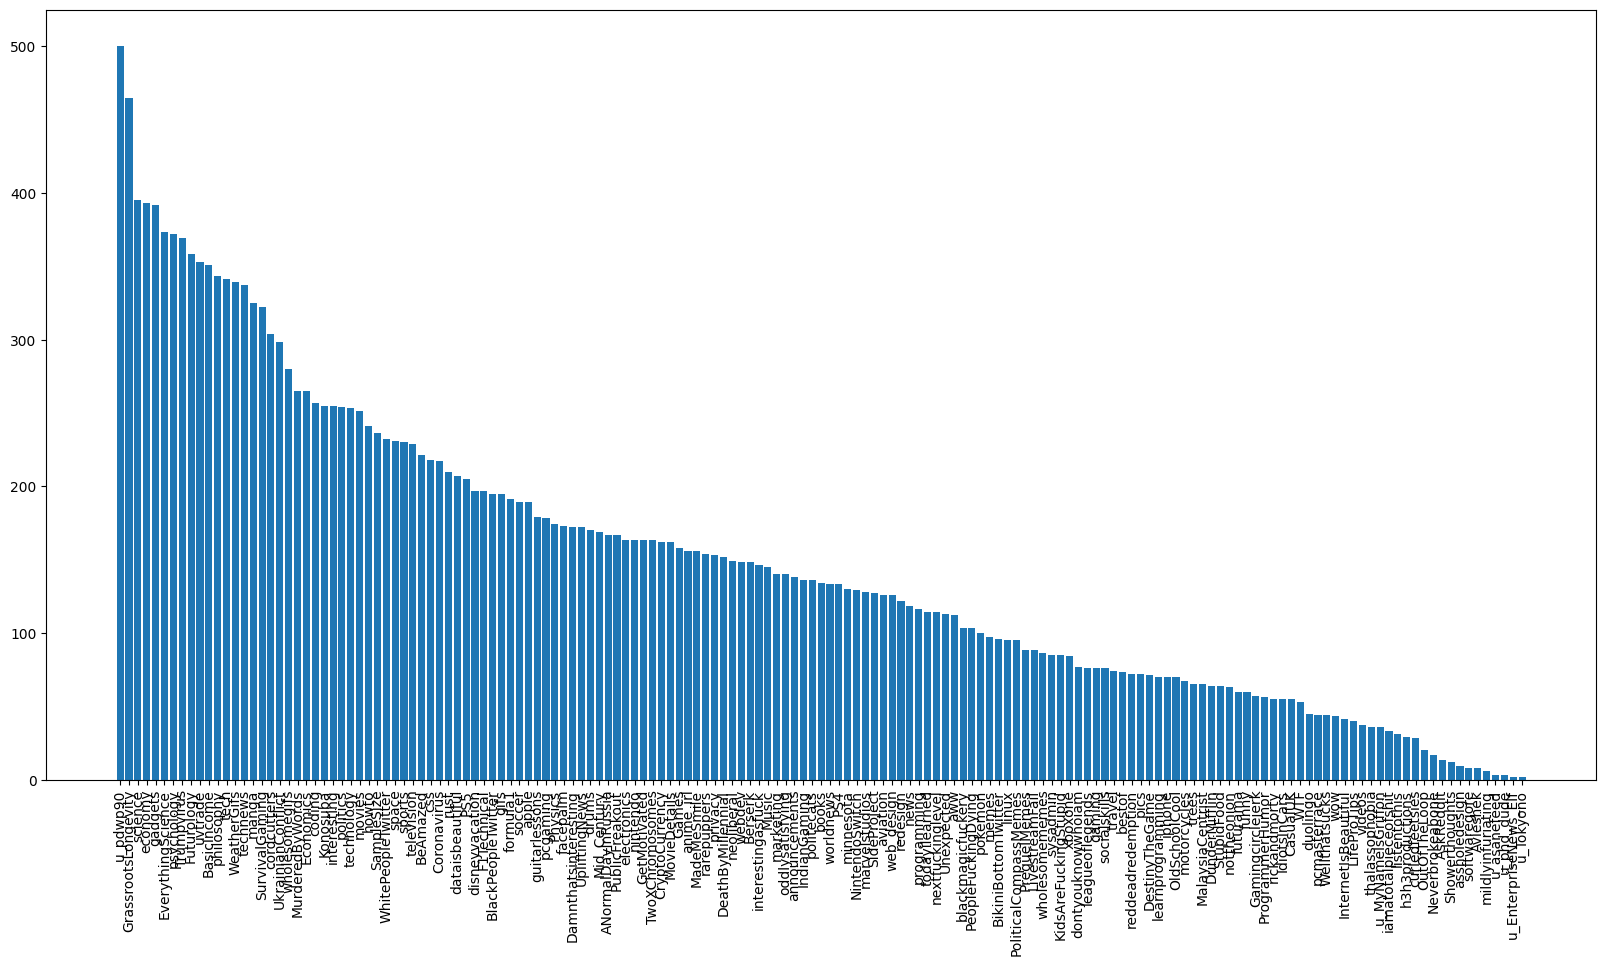

In [6]:
num_posts_per_sub = posts_df.groupby("subreddit").size().sort_values(ascending=False)
display(num_posts_per_sub.head(10))

# plot the number of posts per subreddit
plt.figure(figsize=(20, 10))
plt.bar(num_posts_per_sub.index, num_posts_per_sub.values)
plt.xticks(rotation=90)
plt.show()


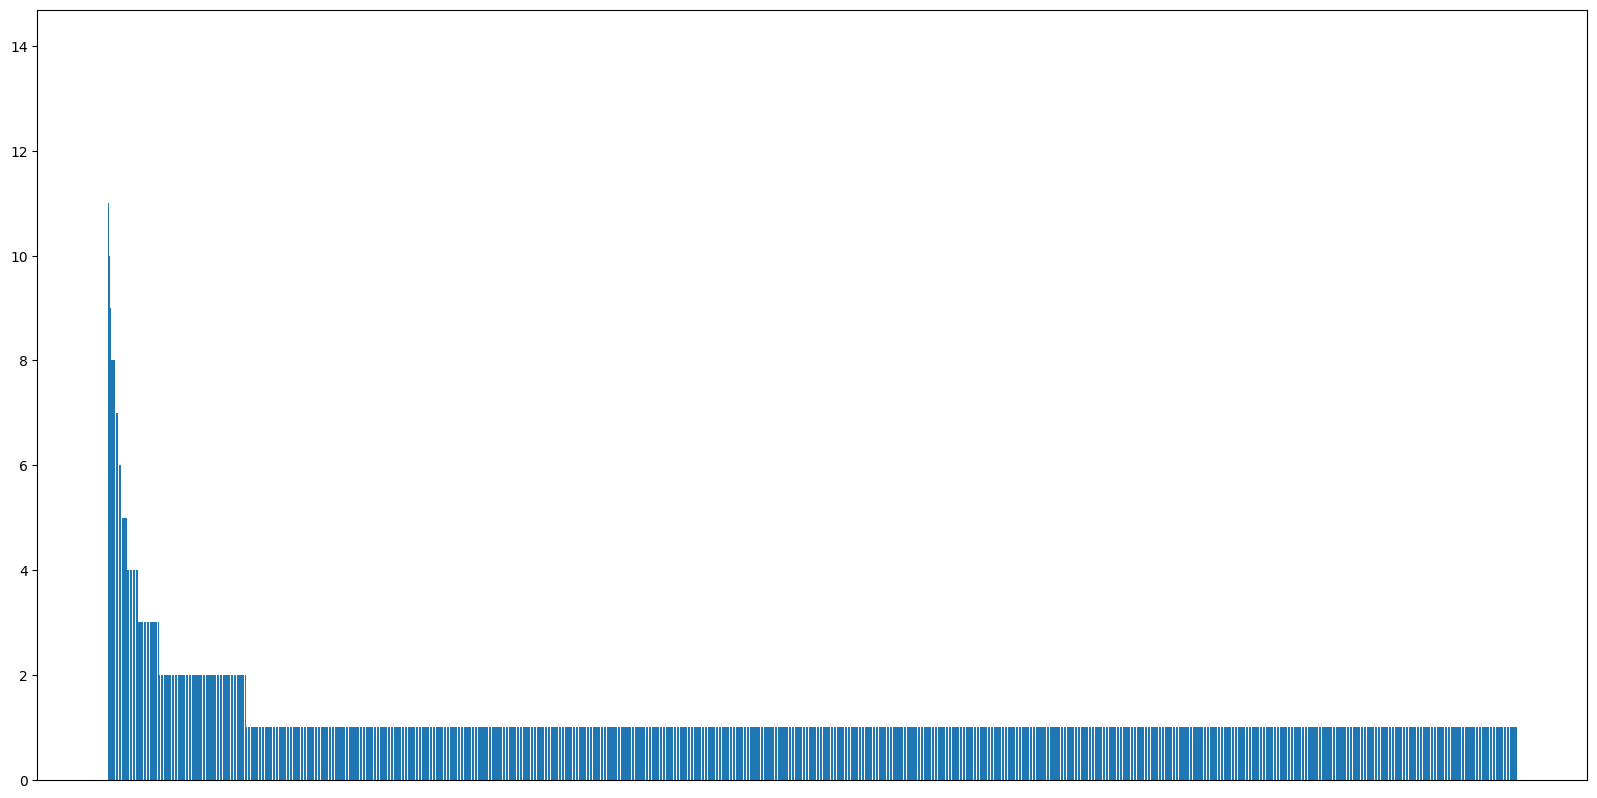

In [32]:
num_subs_per_author = posts_df.groupby(["author", "subreddit"]).size().groupby("author").size().sort_values(ascending=False)
# plot the number of subreddits per author
plt.figure(figsize=(20, 10))
plt.bar(num_subs_per_author.index, num_subs_per_author.values)
plt.xticks([])
plt.show()

In [14]:
author_sub_pairs = posts_df.groupby(["author", "subreddit"]).size().reset_index(name="count").sort_values(by="count", ascending=False)
display(author_sub_pairs.head(10))
display(author_sub_pairs.info())

author_sub_pairs.to_csv(f"{NETWORKS_PATH}/author_sub_pairs.csv", index=False)

,author,subreddit,count
4778,pdwp90,u_pdwp90,500
1588,MichaelTen,GrassrootsLongevity,330
3146,beerbellybegone,MurderedByWords,228
4616,mvea,Futurology,182
4618,mvea,science,176
1119,IAI_Admin,philosophy,137
37,2noame,BasicIncome,131
4929,relevantlife,TwoXChromosomes,104
1973,Philo1927,cordcutters,103
5138,solateor,WeatherGifs,102


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5665 entries, 4778 to 5664
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     5665 non-null   object
 1   subreddit  5665 non-null   object
 2   count      5665 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 177.0+ KB


None

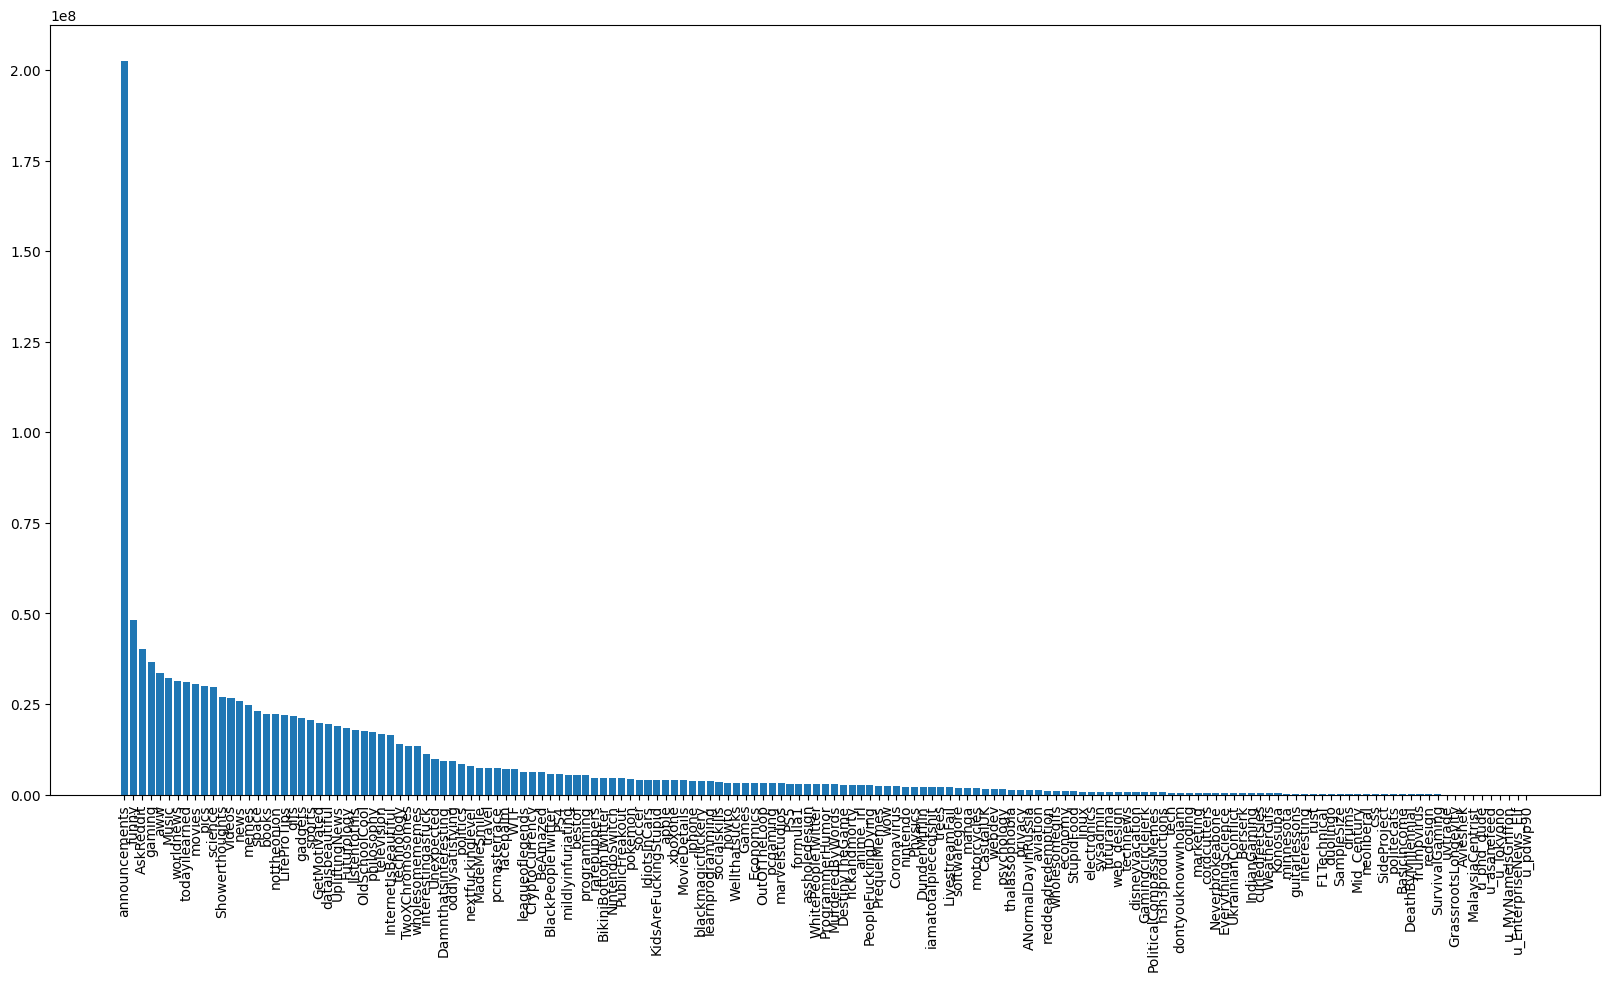

In [28]:
sub_data = posts_df.groupby("subreddit").agg("subreddit_subscribers").mean().sort_values(ascending=False).reset_index()
sub_data["subreddit_subscribers"] = sub_data["subreddit_subscribers"].apply(lambda x: round(x))

sub_data.to_csv(f"{NETWORKS_PATH}/sub_data.csv", index=False)

plt.figure(figsize=(20, 10))
plt.bar(sub_data["subreddit"], sub_data["subreddit_subscribers"])
plt.xticks(rotation=90)
plt.show()

In [29]:
posts_df.head()

,title,score,id,url,num_comments,created,author,upvote_ratio,permalink,subreddit,subreddit_subscribers,author_name
0,anime_irl,61838,v5pw6o,https://i.redd.it/uh2vc0cy4w391.gif,535,1.654473e+09,NekoWafers,0.92,/r/anime_irl/comments/v5pw6o/anime_irl/,anime_irl,2680226,NekoWafers
1,anime_irl,48804,rlbhh5,https://v.redd.it/wqlc6vm6dv681,684,1.640081e+09,StazCherryBlood,0.96,/r/anime_irl/comments/rlbhh5/anime_irl/,anime_irl,2680226,StazCherryBlood
2,anime_irl,38093,pcxzf1,https://v.redd.it/vwyw14czbzj71,419,1.630105e+09,NekoWafers,0.94,/r/anime_irl/comments/pcxzf1/anime_irl/,anime_irl,2680226,NekoWafers
3,anime_irl,36736,v7xkmk,https://i.redd.it/ztianvtf6g491.gif,405,1.654716e+09,Levi-7536,0.95,/r/anime_irl/comments/v7xkmk/anime_irl/,anime_irl,2680226,Levi-7536
4,anime_irl,35174,vkamt7,https://v.redd.it/h4g5hyzvbq791,579,1.656146e+09,Hot_Fan_,0.94,/r/anime_irl/comments/vkamt7/anime_irl/,anime_irl,2680226,Hot_Fan_


In [15]:
G = nx.from_pandas_edgelist(author_sub_pairs, source="author", target="subreddit", edge_attr="count")